# Домашнее задание «Временные ряды, общая теория» (Знакомство с временными рядами)


* Проанализируйте ряды, сделайте их стационарными.



In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [5]:
sales_of_company_x = pd.read_csv("/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/TimeSeries/1._Лекция/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/TimeSeries/1._Лекция/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/TimeSeries/1._Лекция/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/TimeSeries/1._Лекция/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/TimeSeries/1._Лекция/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/TimeSeries/1._Лекция/Series/daily-total-female-births-in-cal.csv")

In [20]:
list_ = [sales_of_company_x, robberies_in_boston, airlines_passengers, mean_monthly_temp, dowjones_closing, female_births]
for i in list_:
    print(i.info)

<bound method DataFrame.info of       Month  Count
0   1965-01    154
1   1965-02     96
2   1965-03     73
3   1965-04     49
4   1965-05     36
..      ...    ...
72  1971-01    628
73  1971-02    308
74  1971-03    324
75  1971-04    248
76  1971-05    272

[77 rows x 2 columns]>
<bound method DataFrame.info of        Month  Count
0    1966-01     41
1    1966-02     39
2    1966-03     50
3    1966-04     40
4    1966-05     43
..       ...    ...
113  1975-06    316
114  1975-07    398
115  1975-08    394
116  1975-09    431
117  1975-10    431

[118 rows x 2 columns]>
<bound method DataFrame.info of        Month  Count
0    1949-01    112
1    1949-02    118
2    1949-03    132
3    1949-04    129
4    1949-05    121
..       ...    ...
139  1960-08    606
140  1960-09    508
141  1960-10    461
142  1960-11    390
143  1960-12    432

[144 rows x 2 columns]>
<bound method DataFrame.info of        Month   Deg
0    1920-01  40.6
1    1920-02  40.8
2    1920-03  44.4
3    1920-04  

In [18]:
all_time_series = {
    "Monthly sales of company X": sales_of_company_x['Count'],
    "Monthly Boston armed robberies": robberies_in_boston['Count'],
    "International airline passengers": airlines_passengers['Count'],
    "Mean monthly air temperature degree": mean_monthly_temp['Deg'],
    "Weekly closings of the dowjones": dowjones_closing['Close'],
    "Daily total female births in cal": female_births['Count']
}

Отрисовка графиков с временными рядами

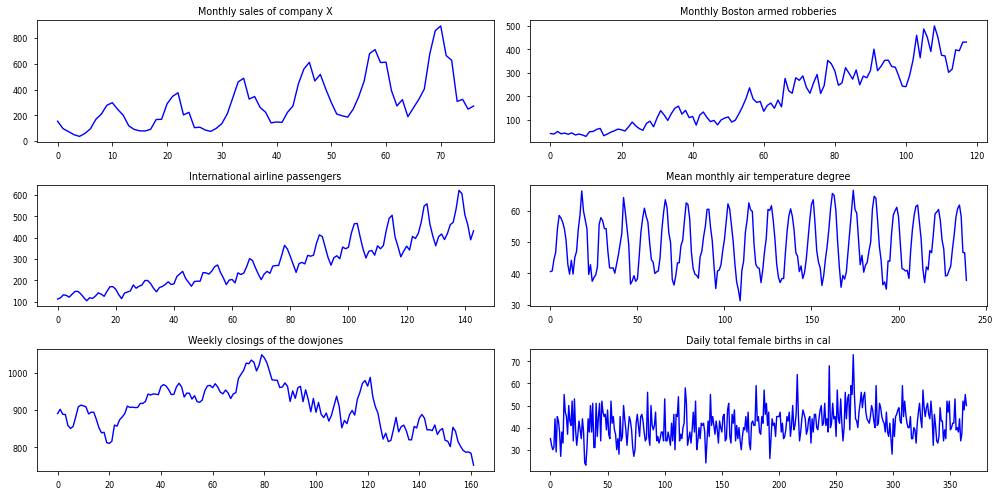

In [37]:
with plt.style.context('seaborn-paper'):
    plt.figure(figsize=(14, 7))
    layout = (3, 2)
    for i, key in enumerate(all_time_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_time_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()
        

# Функции для анализа временных рядов

In [52]:
def test_stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [53]:
def tsplot(y, lags=None, figsize=(14, 7), style='seaborn-paper'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [54]:
def plot_ts_and_points(ts, start, step):
    new_ts = [None for i in range(len(ts))]
    
    for i in range(len(ts)):
        position = start + step * i
        if position >= len(ts):
            break    
        new_ts[position] = ts[position]
    
    new_ts = pd.Series(new_ts)
    
    with plt.style.context('seaborn-paper'):
        plt.figure(figsize=(14, 7))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_ts.plot(ax=ts_ax, style='ro')

# Проанализируем продажи за месяц в компании Х (Monthly sales of company X): 


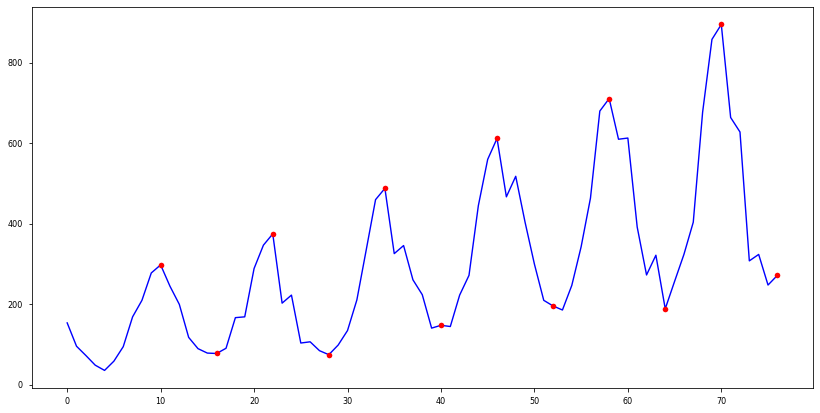

In [56]:
plot_ts_and_points(sales_of_company_x['Count'], 10, 6)

Итого:
 * Видим положительный тренд - рост числа месячных продаж к каждым годом;
 * Видим сезонность - число продаж растет к концу года и достигает пика каждые 12 месяцев, в то время как наименее успешные по количеству продаж месяцы выпадают на лето и минимум достигается также каждые 12 месяцев

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


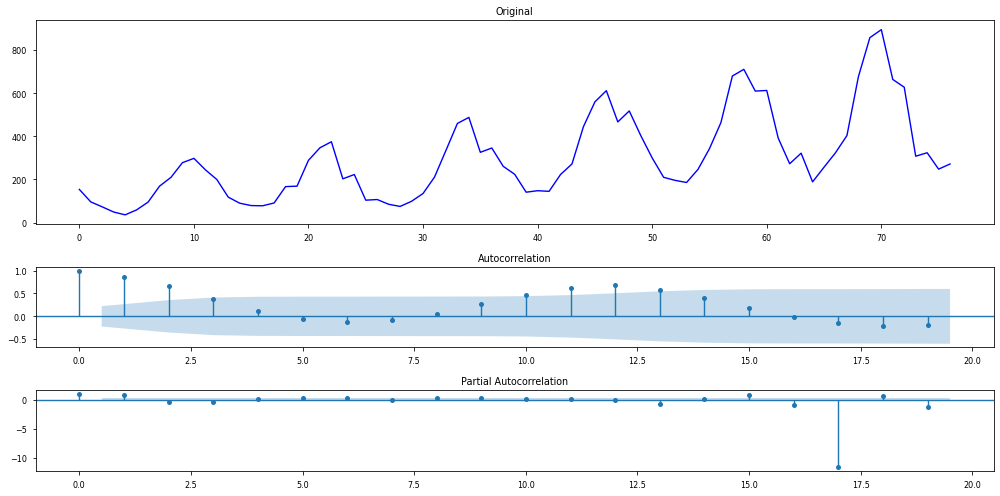

In [55]:
tsplot(sales_of_company_x['Count'])

Сильная связь обнаруживается в лаге примерно в 12 месяцев

Временной ряд нестационарен, поскольку имеются тренд и сезонность. Также уровень корреляции достаточно высокий при лаге +- 12

In [80]:
changed_ts = boxcox(sales_of_company_x['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


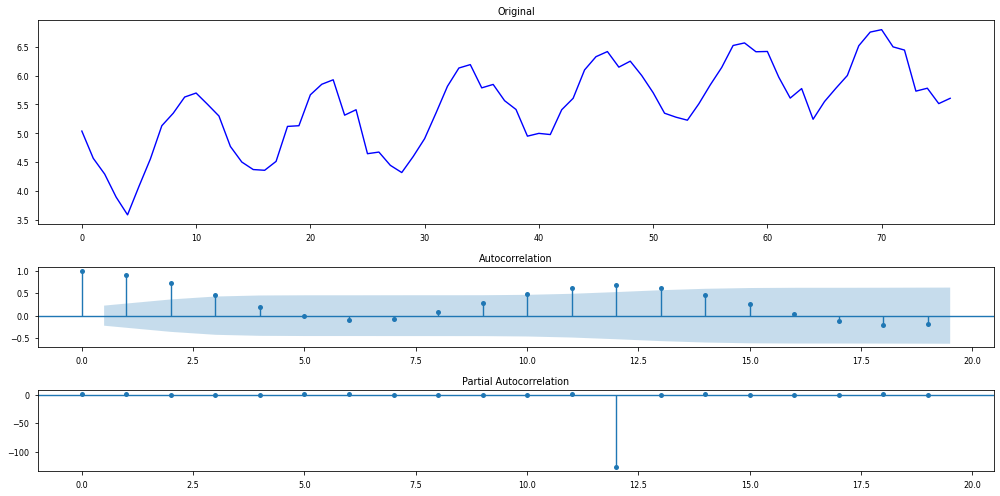

In [81]:
tsplot(changed_ts)

Ничего не изменилось особо - сезонность очевидна, тренд также прослеживается. Можно попробовать дифференцирование.

In [82]:
changed_ts = changed_ts[1:] - changed_ts[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


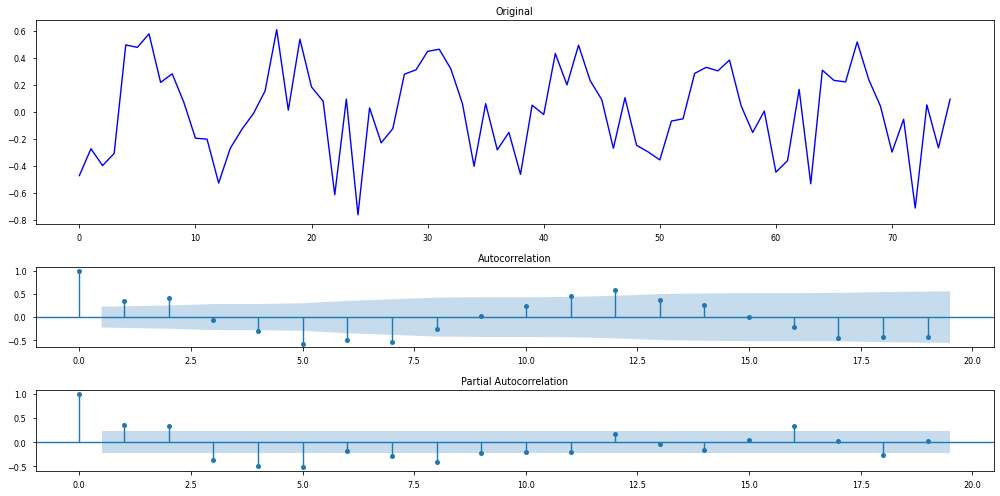

In [83]:
tsplot(changed_ts)

Улучшений особо нет.

In [84]:
changed_ts = changed_ts[6:] - changed_ts[:-6]

Results of Dickey-Fuller Test:
Test Statistic                -1.051523e+01
p-value                        1.000402e-18
#Lags Used                     6.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


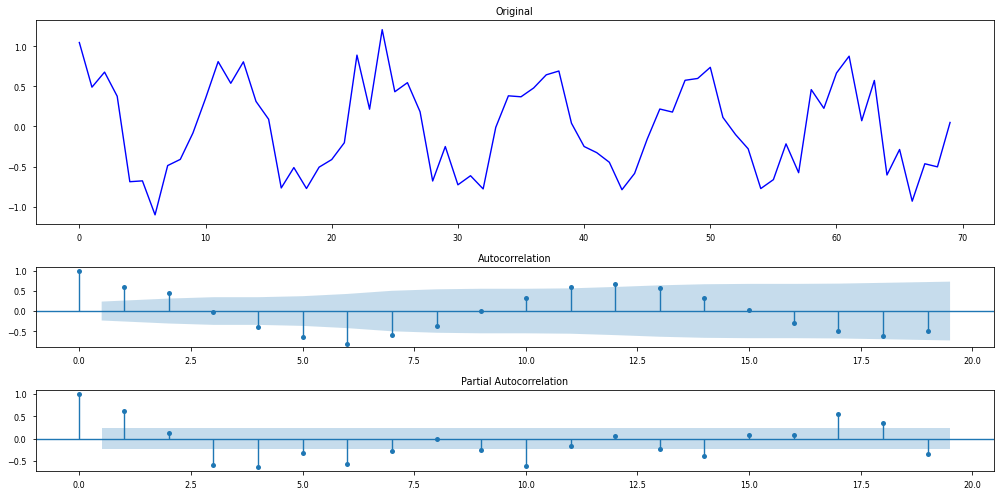

In [85]:
tsplot(changed_ts)

In [86]:
changed_ts = changed_ts[12:] - changed_ts[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -2.140741
p-value                         0.228451
#Lags Used                     10.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


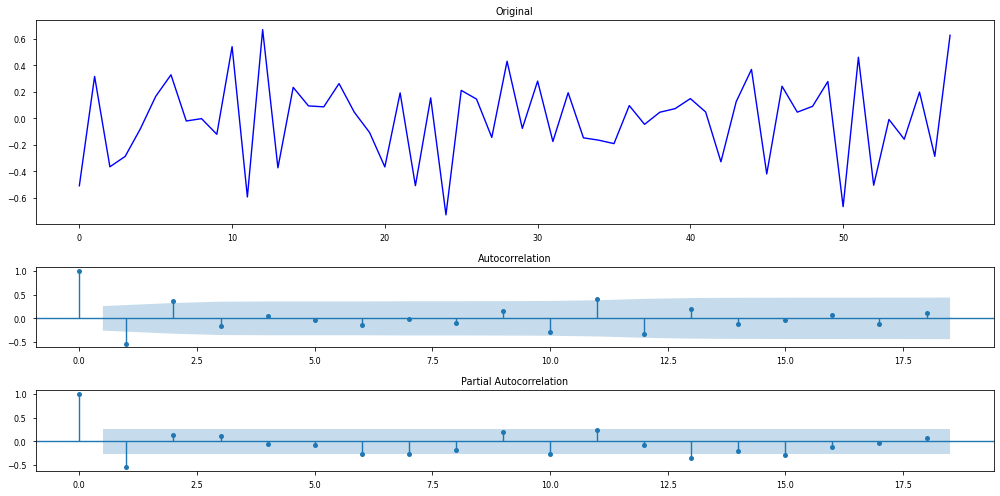

In [87]:
tsplot(changed_ts)

Теперь лучше, но не идеально.

In [88]:
changed_ts = changed_ts[10:] - changed_ts[:-10]

Results of Dickey-Fuller Test:
Test Statistic                 -3.902032
p-value                         0.002020
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


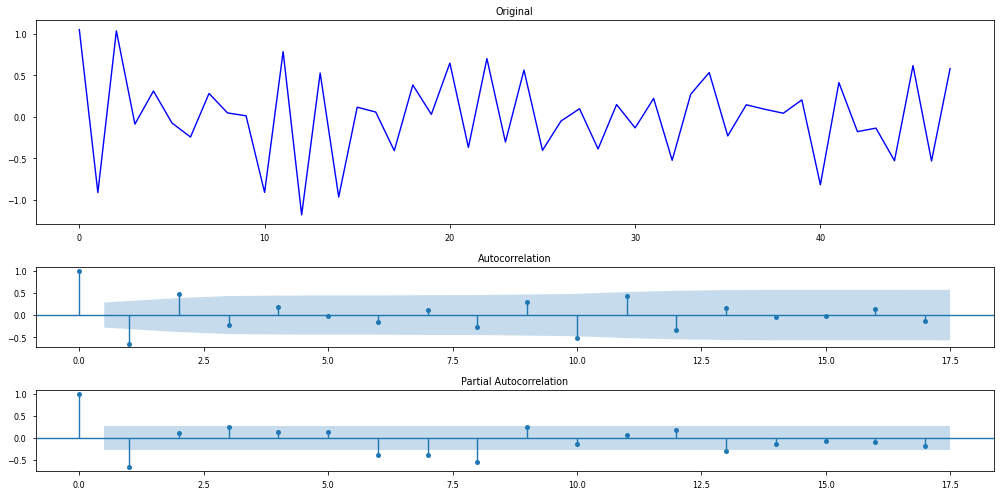

In [89]:
tsplot(changed_ts)

Теперь ряд стационарен судя по значению p value.

# Проанализируем данные по количеству вооруженных ограблений в месяц в Бостоне (Monthly Boston armed robberies):

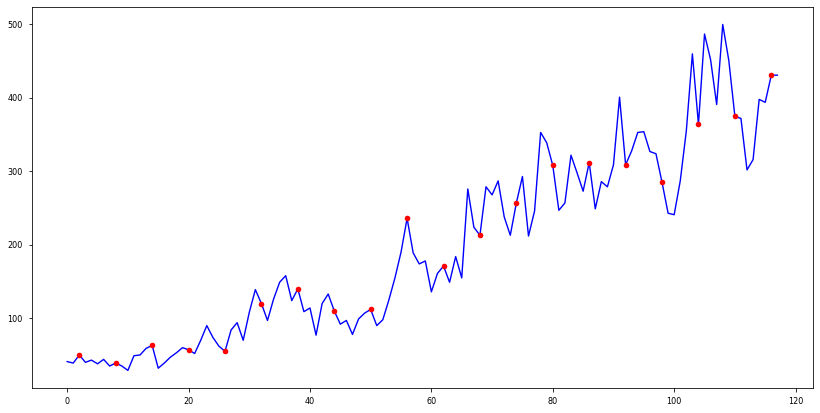

In [67]:
plot_ts_and_points(robberies_in_boston['Count'], 2, 6)

Имеется тренд - общий рост количества вооруженных ограблений. Сезонность или циклы не наблюдаются.

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


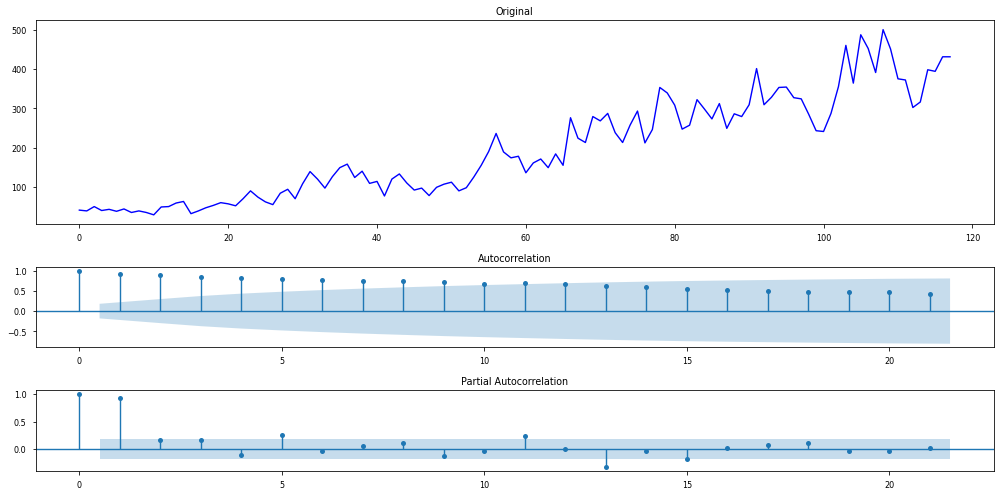

In [90]:
tsplot(robberies_in_boston['Count'])

In [91]:
changed_ts = boxcox(robberies_in_boston['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


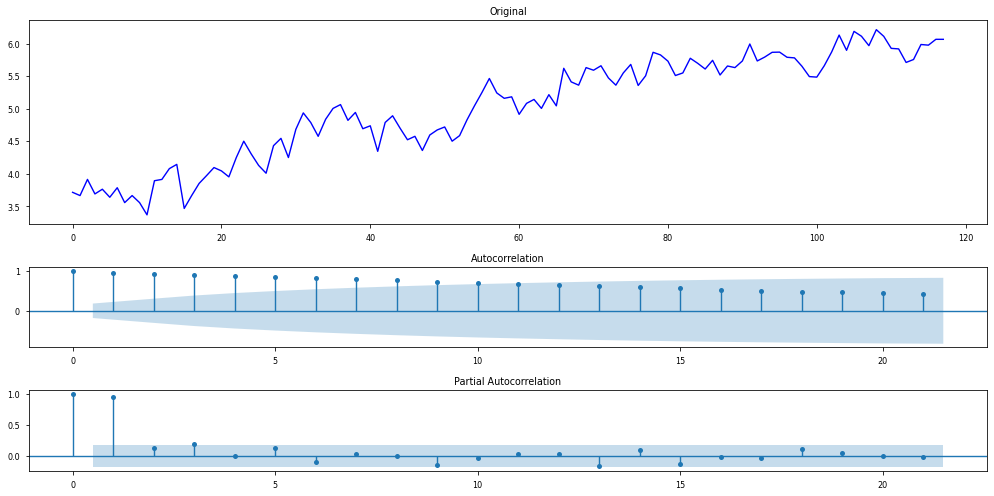

In [92]:
tsplot(changed_ts)

In [93]:
changed_ts = changed_ts[1:] - changed_ts[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


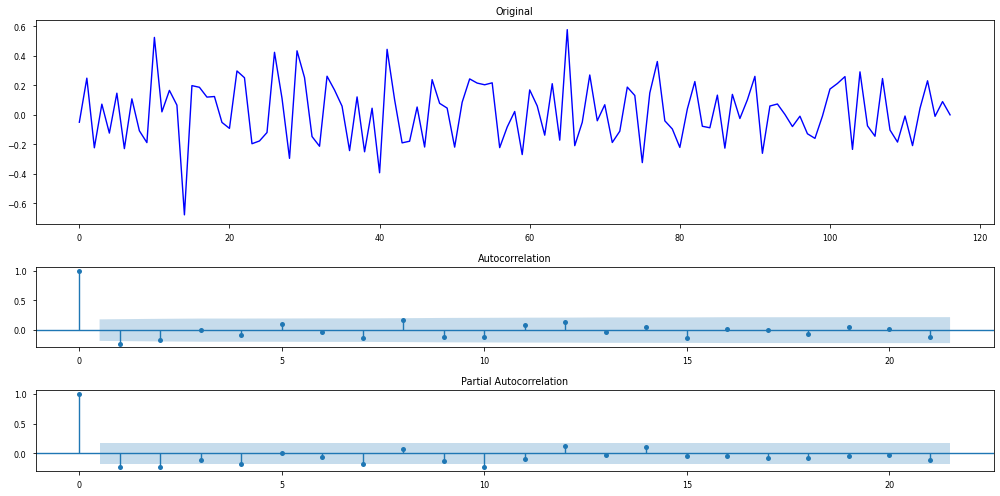

In [94]:
tsplot(changed_ts)

Теперь ряд стационарен.

# Проанализируем данные по количеству пассажиров международных авиакомпаний (International airline passengers):

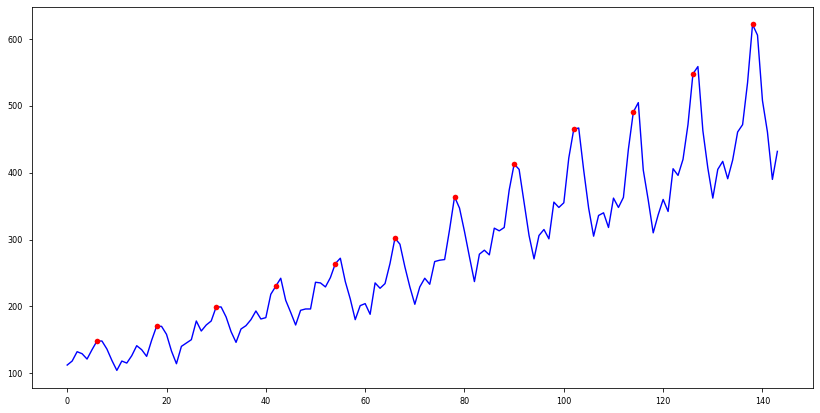

In [107]:
plot_ts_and_points(airlines_passengers['Count'], 6, 12)

Есть тренд и сезонность.

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


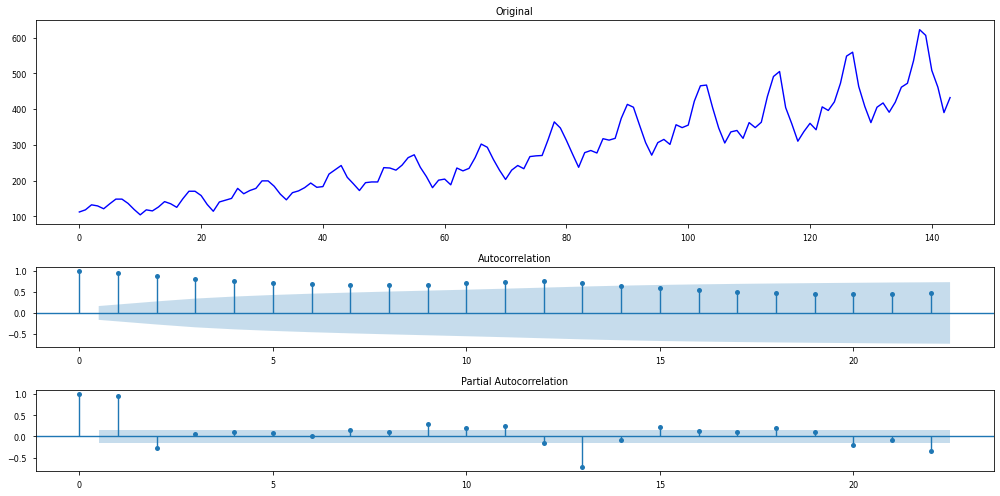

In [99]:
tsplot(airlines_passengers['Count'])

In [100]:
changed_ts = boxcox(airlines_passengers['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


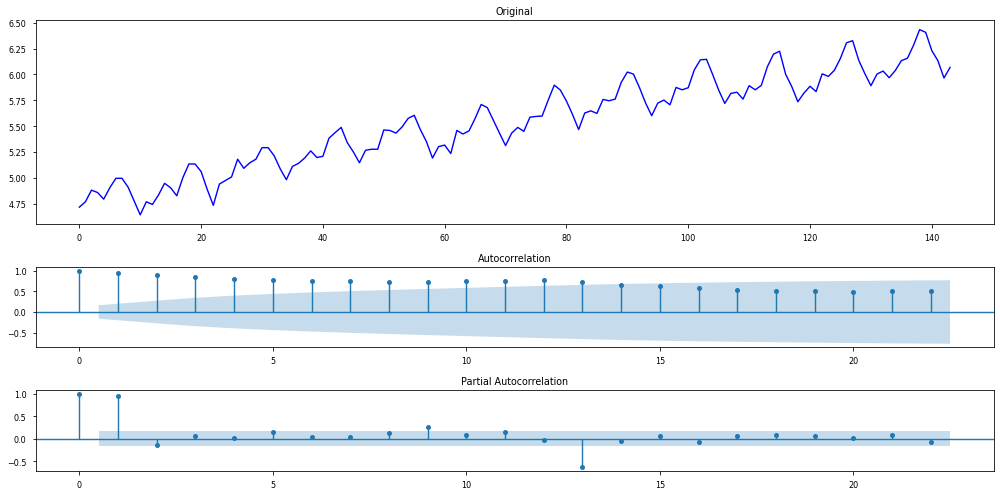

In [101]:
tsplot(changed_ts)

In [102]:
changed_ts = changed_ts[1:] - changed_ts[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


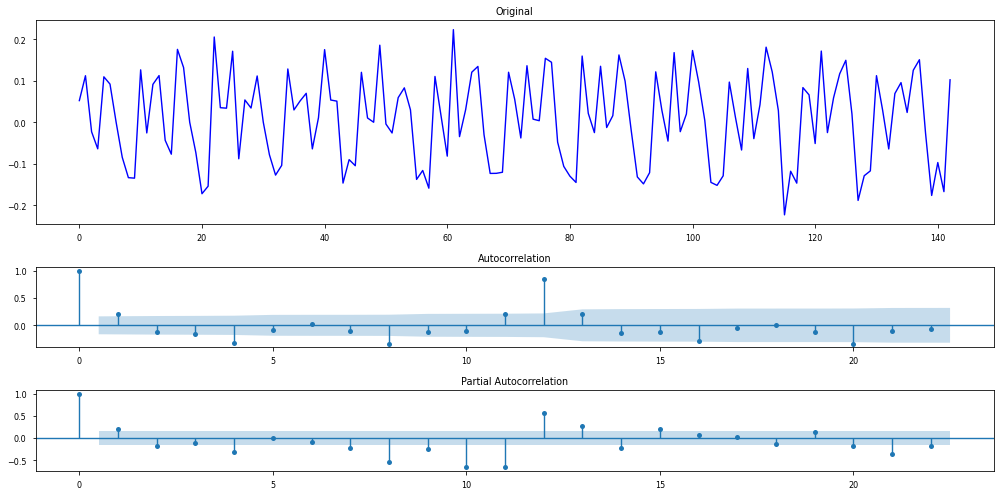

In [103]:
tsplot(changed_ts)

In [104]:
changed_ts = changed_ts[12:] - changed_ts[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


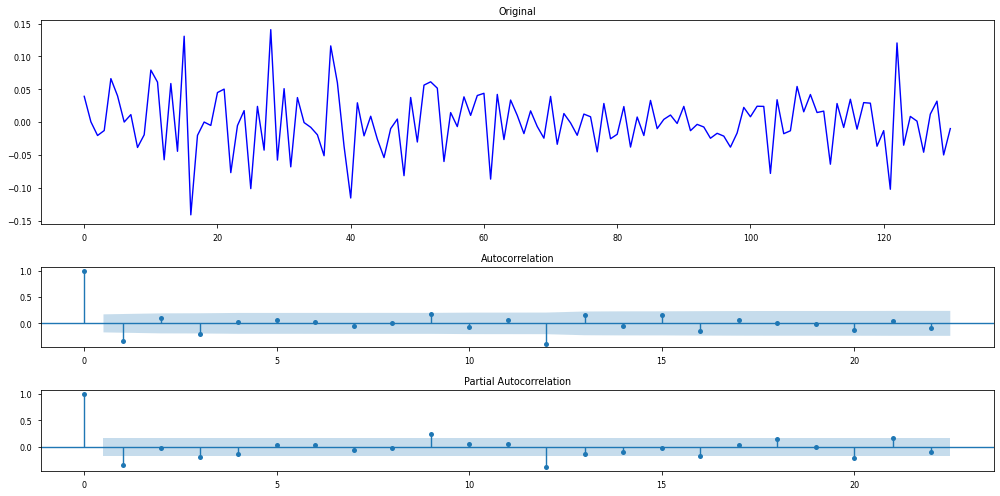

In [105]:
tsplot(changed_ts)

Теперь ряд стационарен.

# Проанализируем данные по средней месячной температуре (Mean monthly air temperature degree):

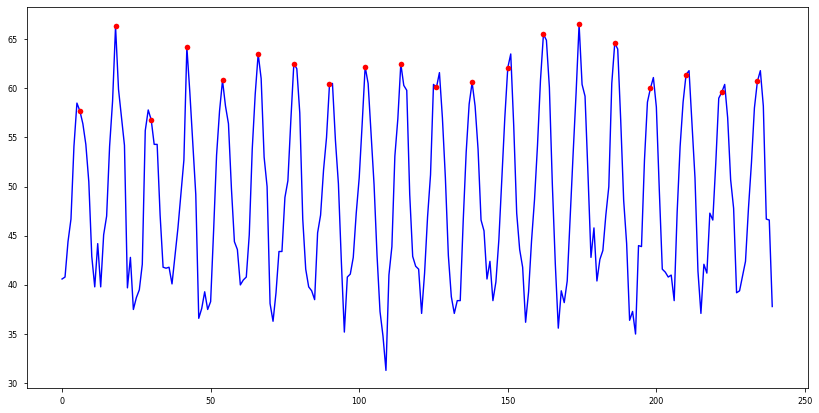

In [108]:
plot_ts_and_points(mean_monthly_temp['Deg'], 6, 12)

Есть сезонность (высокая температура летом и низкая зимой).

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


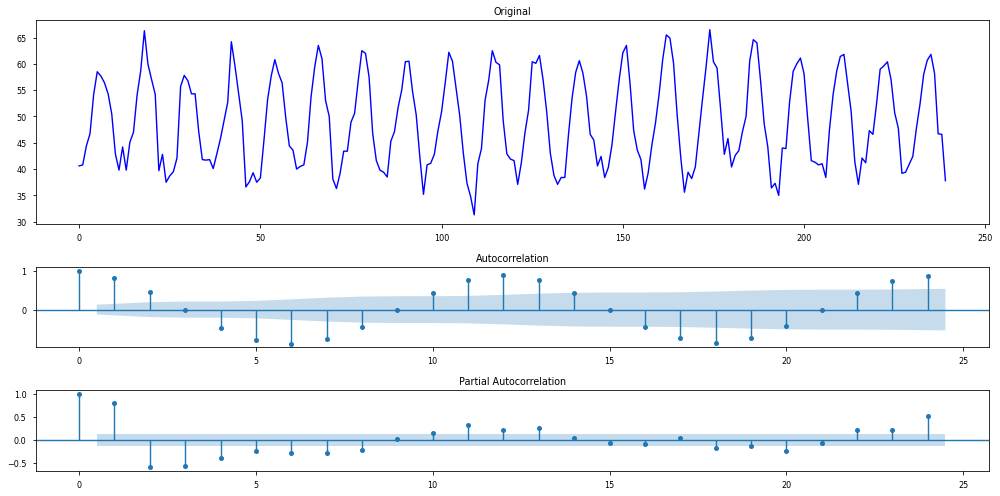

In [109]:
tsplot(mean_monthly_temp['Deg'])

In [110]:
changed_ts = boxcox(mean_monthly_temp['Deg'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


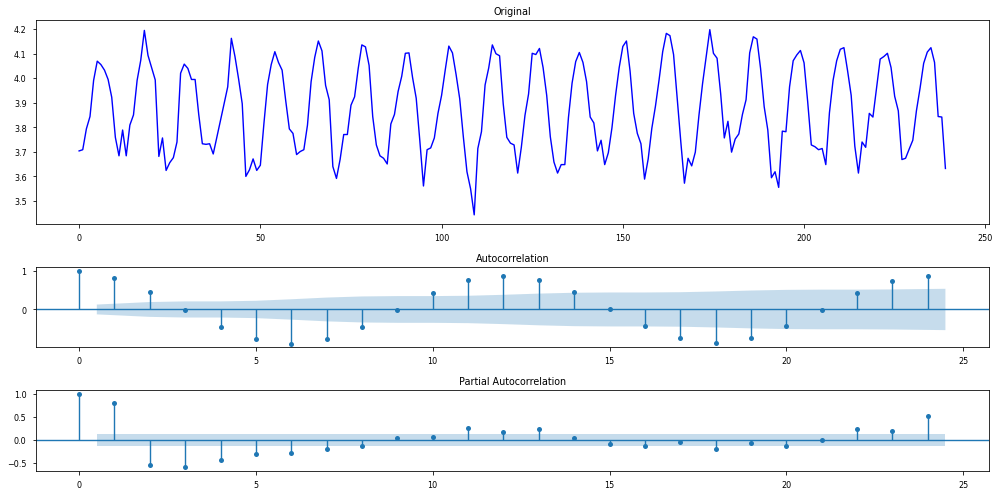

In [111]:
tsplot(changed_ts)

In [112]:
changed_ts = changed_ts[12:] - changed_ts[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


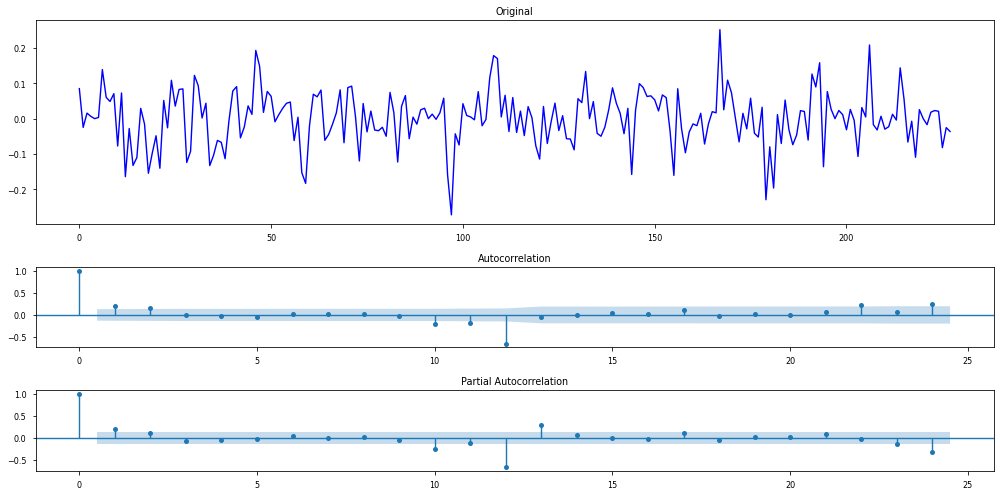

In [113]:
tsplot(changed_ts)

Теперь ряд стационарен.

# Проанализируем данные по еженедельному закрытию индекса Dowjones (Weekly closings of the dowjones):

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


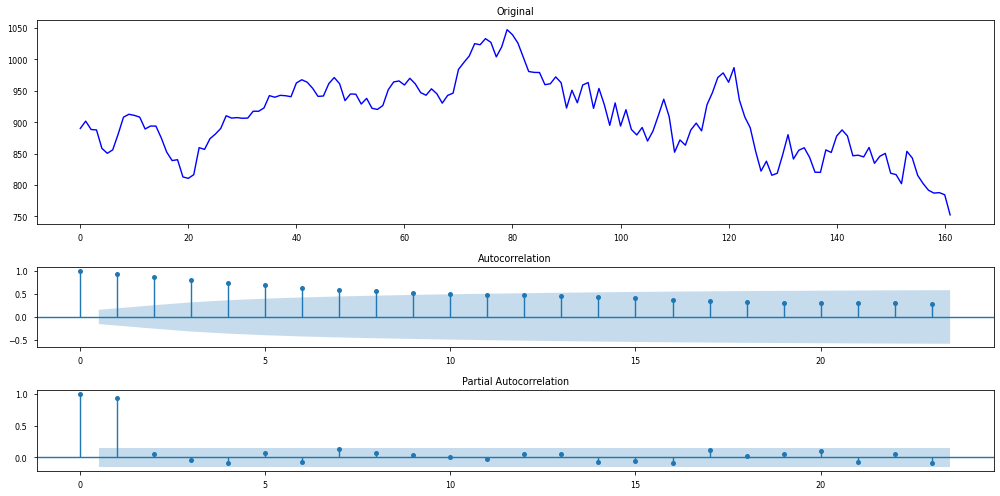

In [121]:
tsplot(dowjones_closing['Close'])

Имеется 2 тренда (положительный и негативный)

In [122]:
changed_ts = boxcox(dowjones_closing['Close'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


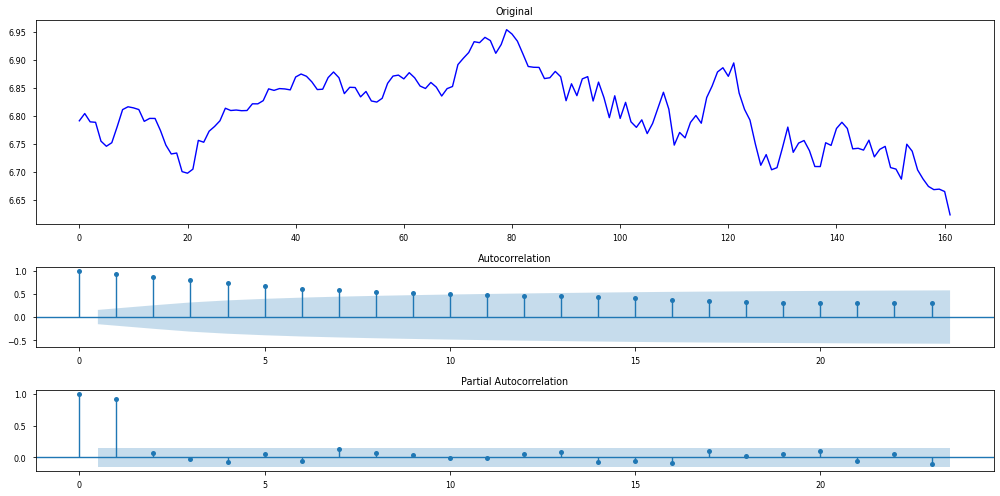

In [123]:
tsplot(changed_ts)

In [124]:
changed_ts = np.diff(changed_ts, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


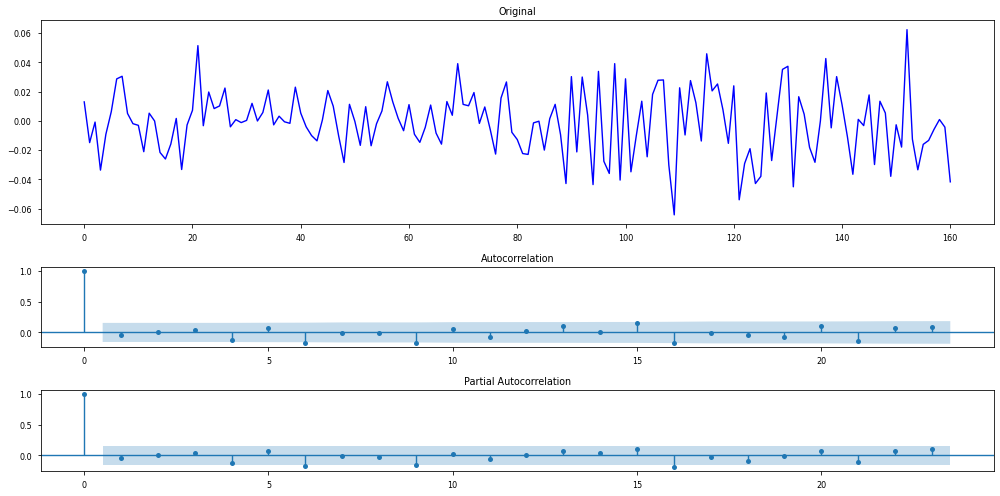

In [125]:
tsplot(changed_ts)

Теперь ряд стационарен.

# Проанализируем данные по Daily total female births in cal:

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


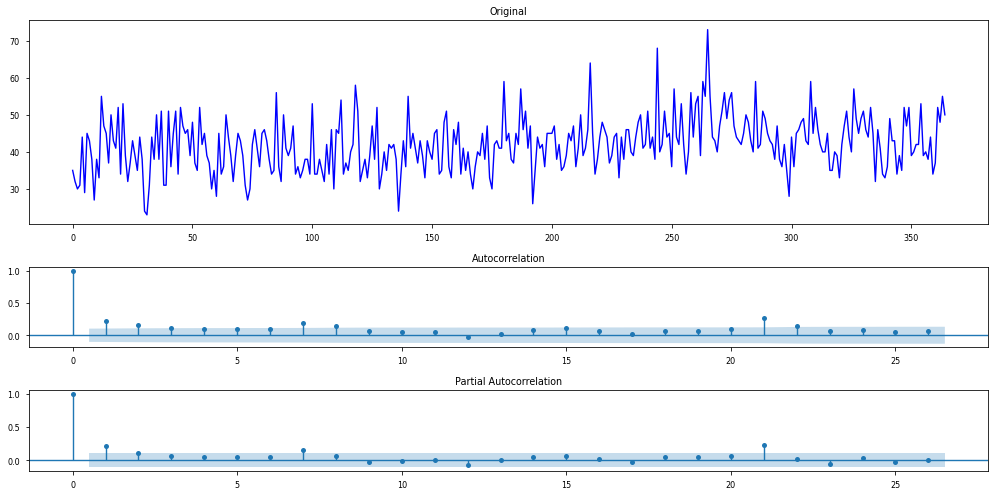

In [119]:
tsplot(female_births['Count'])

Отсутствуют тренды и сезонность. Ряд стационарен.